In [136]:
import pandas as pd
df = pd.read_csv('pli_policy_details_ai.csv')

C:\Users\skr25\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,12,13,19,20,22,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix


#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
#ConvergenceWarning

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

C:\Users\skr25\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline
from sklearn.inspection import permutation_importance
#import shap

In [6]:
# Data display coustomization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Duplicates

In [7]:
df_dub = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dub.drop_duplicates(subset=None, inplace=True)
df_dub.shape

(1716547, 37)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716547 entries, 0 to 1716546
Data columns (total 37 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id                   int64  
 1   policy_id            object 
 2   policy_term          float64
 3   premium_term         float64
 4   policy_status        object 
 5   risk_comm_date       object 
 6   maturity_date        object 
 7   sundry_bal_amt       float64
 8   total_prem_outs_bal  float64
 9   premium_frequency    object 
 10  payment_method       object 
 11  premium              float64
 12  next_due_date        object 
 13  last_pay_rec_date    object 
 14  propsal_date         object 
 15  proposal_number      object 
 16  branch               object 
 17  agent_code           int64  
 18  date_of_lapse        object 
 19  policy_id_c          object 
 20  counter_info_c       object 
 21  info_c               float64
 22  pivc_status_c        object 
 23  policy_type_c        object 
 24

In [9]:
#checking null values
df.isnull().sum()

id                           0
policy_id                    0
policy_term                  2
premium_term             17001
policy_status            17568
risk_comm_date               0
maturity_date             2576
sundry_bal_amt            6069
total_prem_outs_bal    1716547
premium_frequency         2685
payment_method          449435
premium                  17001
next_due_date           944657
last_pay_rec_date      1364683
propsal_date                 0
proposal_number           1319
branch                   53801
agent_code                   0
date_of_lapse           355495
policy_id_c                  0
counter_info_c         1716535
info_c                 1716547
pivc_status_c          1643144
policy_type_c                0
policyname_c                 0
sum_assured_c                2
account_id                   0
account_id_c                 0
balance_c              1716547
date_of_birth_c              0
current_age_c          1716546
marital_status_c        155054
no_of_ch

In [10]:
#checking null values as a percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

id                      0.00000
policy_id               0.00000
policy_term             0.00000
premium_term            0.99000
policy_status           1.02000
risk_comm_date          0.00000
maturity_date           0.15000
sundry_bal_amt          0.35000
total_prem_outs_bal   100.00000
premium_frequency       0.16000
payment_method         26.18000
premium                 0.99000
next_due_date          55.03000
last_pay_rec_date      79.50000
propsal_date            0.00000
proposal_number         0.08000
branch                  3.13000
agent_code              0.00000
date_of_lapse          20.71000
policy_id_c             0.00000
counter_info_c        100.00000
info_c                100.00000
pivc_status_c          95.72000
policy_type_c           0.00000
policyname_c            0.00000
sum_assured_c           0.00000
account_id              0.00000
account_id_c            0.00000
balance_c             100.00000
date_of_birth_c         0.00000
current_age_c         100.00000
marital_

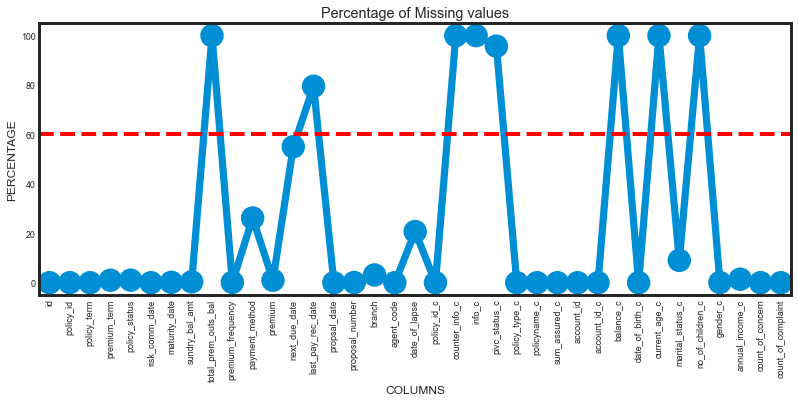

In [11]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(60, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [137]:
# we will drop the columns having more than 60% NA values.
df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>60)].columns, 1,inplace= True)

In [138]:
#seperating the categorical and numerical features
categorical_col = df.select_dtypes(exclude =["number"]).columns.values
numerical_col = df.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['policy_id' 'policy_status' 'risk_comm_date' 'maturity_date'
 'premium_frequency' 'payment_method' 'next_due_date' 'propsal_date'
 'proposal_number' 'branch' 'date_of_lapse' 'policy_id_c' 'policy_type_c'
 'policyname_c' 'account_id' 'account_id_c' 'date_of_birth_c'
 'marital_status_c' 'gender_c'] 


NUMERICAL FEATURES : 
 ['id' 'policy_term' 'premium_term' 'sundry_bal_amt' 'premium' 'agent_code'
 'sum_assured_c' 'annual_income_c' 'count_of_concern' 'count_of_complaint'] 


In [139]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["unique_values_percent"] = (df[value].nunique()/len(df.index)*100)
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [140]:
df_cat = Cat_info(df, categorical_col)
df_cat

,values,unique_values,null_values,null_percent,unique_values_percent
columns,,,,,
next_due_date,"[nan, 2020-10-11, 2018-03-31, 2019-01-12, 2021...",4675,944657,55.00000,0.27235
payment_method,"[Cheque, Direct Debits, Automated Clearing Hou...",8,449435,26.20000,0.00047
date_of_lapse,"[nan, 2017-06-04, 2017-09-16, 2019-06-23, 2017...",10,355495,20.70000,0.00058
marital_status_c,"[nan, Married, UnMarried, Widow, Divorcee, Wid...",9,155054,9.00000,0.00052
branch,"[nan, PLIL- HO, PLIL- FARIDABAD, PLIL- PATIALA...",7407,53801,3.10000,0.43151
policy_status,"[Contract Proposal, In Force, Policy Terminate...",33,17568,1.00000,0.00192
premium_frequency,"[Annual, Monthly, Single, Semi Annual, Quarter...",5,2685,0.20000,0.00029
maturity_date,"[2026-06-15, 2030-01-11, 2027-03-31, 2033-01-1...",21222,2576,0.20000,1.23632
proposal_number,"[AF999999999, DF000635074, AF004598104, AF0049...",1042970,1319,0.10000,60.75977


In [141]:
# Appending the columns to col_to_drop where only 1 category value is present
cols_to_drop = df_cat[df_cat['unique_values_percent'] >= 95].index.values.tolist() 
cols_to_drop

['policy_id_c', 'policyname_c', 'policy_id']

In [142]:
#dropping unnecessary columns
df.drop(cols_to_drop, 1, inplace = True)
len(df.columns)

26

In [143]:
df1 = df.copy()

In [144]:
df = df1[df1['premium_frequency'] != 'Single']

In [145]:
df.shape


(771565, 26)

In [146]:
df[df['policy_type_c'] == 'Group'].shape

(2578, 26)

In [147]:
df[df['policy_type_c'] == 'Group']['premium_frequency'].nunique()

0

In [148]:
df[df['policy_type_c'] == 'Group']['policy_status'].value_counts()

In Force                         2417
Cancel From Inception              70
Full Surrender                     70
Terminated by various reasons      14
Death Claim Processed               5
Name: policy_status, dtype: int64

In [149]:
df = df[df['policy_type_c'] != 'Group']

In [150]:
df = df[df['policy_status'].notnull()]

In [151]:
categorical_col = df.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(df, categorical_col)
new_cat

,values,unique_values,null_values,null_percent,unique_values_percent
columns,,,,,
date_of_lapse,"[nan, 2017-06-04, 2017-09-16, 2019-06-23, 2017...",9,333808,43.40000,0.00117
next_due_date,"[nan, 2020-10-11, 2018-03-31, 2021-05-31, 2020...",4674,20314,2.60000,0.60790
marital_status_c,"[nan, Married, UnMarried, Widow, Divorcee, Wid...",5,4012,0.50000,0.00065
gender_c,"[nan, Female, Male]",2,1232,0.20000,0.00026
branch,"[nan, PLIL- HO, PLIL- PATIALA, PLIL- GURGAON, ...",134,1,0.00000,0.01743
policy_status,"[Contract Proposal, In Force, Policy Terminate...",28,0,0.00000,0.00364
risk_comm_date,"[2016-06-15, 2018-01-11, 2017-03-31, 2018-05-3...",3994,0,0.00000,0.51946
maturity_date,"[2026-06-15, 2030-01-11, 2027-03-31, 2043-05-3...",20088,0,0.00000,2.61263
premium_frequency,"[Annual, Monthly, Semi Annual, Quarterly]",4,0,0.00000,0.00052


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.1 payment method
            </span>   
        </font>    
</h3>

In [35]:
#checking payment method tags and the percentage of records
df['payment_method'].value_counts(normalize=True)*100

Cheque                       47.76220
Direct Debits                27.86326
Automated Clearing House     14.10818
Auto Debit (Clone of Cash)    5.10587
ECS                           4.44179
Direct Billing (Cash)         0.39785
Credit Card                   0.32086
Name: payment_method, dtype: float64

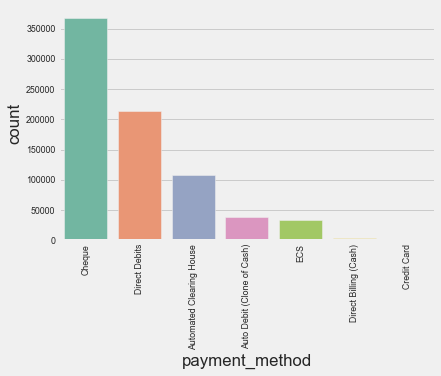

In [36]:
style.use('fivethirtyeight')
ax = sns.countplot(df['payment_method'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.2 marital status
            </span>   
        </font>    
</h3>

In [37]:
#checking marital statuses and the percentage of records
df['marital_status_c'].value_counts(normalize=True)*100

Married     72.61972
UnMarried   26.05678
Widow        0.94108
Widower      0.19860
Divorcee     0.18382
Name: marital_status_c, dtype: float64

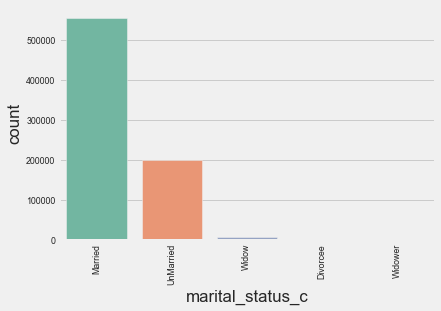

In [38]:
style.use('fivethirtyeight')
ax = sns.countplot(df['marital_status_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

In [152]:
df['marital_status_c'] = df['marital_status_c'].replace(np.nan, 'Not specified')


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.3 branch
            </span>   
        </font>    
</h3>

In [39]:
#checking no of unique branch
df['branch'].nunique()

134

In [40]:
##checking branch tags and the percentage of records only top 20 as there are 7000+ unique values
df['branch'].value_counts(normalize=True)[:20]*100

PLIL- HO            55.17656
PLIL- KOLKATA        2.70069
PLIL- MUMBAI         2.67818
PLIL- GURGAON        2.15522
PLIL- LUCKNOW        1.63225
PLIL- BHUBANESWAR    1.58282
PLIL- CHANDIGARH     1.39879
PLIL- BANGALORE      1.26743
PLIL- BATHINDA       1.23687
PLIL- HYDERABAD      1.12020
PLIL- CHENNAI        1.11474
PLIL- JAMMU          1.09809
PLIL- PATHANKOT      1.07078
PLIL- JALANDHAR      1.04503
PLIL- AHMEDABAD      1.03332
PLIL- BHOPAL         0.79115
PLIL- MEERUT         0.71416
PLIL- LUDHIANA       0.66057
PLIL- NARAINA        0.64575
PLIL- JAIPUR         0.63755
Name: branch, dtype: float64

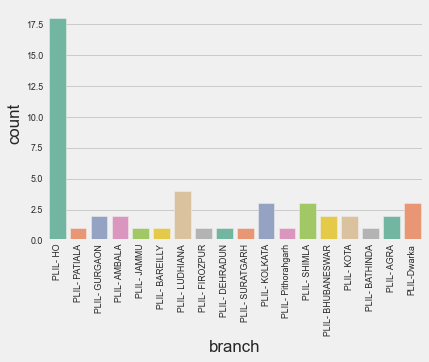

In [41]:
style.use('fivethirtyeight')
ax = sns.countplot(df['branch'][:50],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.4 policy status --> Target variable
            </span>   
        </font>    
</h3>

In [42]:
#checking policy status tags and the percentage of records
df['policy_status'].value_counts(normalize=True)*100

In Force                   35.58982
Policy Terminated          30.78179
Paid Up Contract            8.43812
Contract Surrendered        7.39933
Contract Lapsed             6.21827
Not taken Up                3.14952
Free look Cancellation      2.87977
Reduced Surrender           1.54549
Disc. Terminated            0.99092
Cancelled from Inception    0.74134
Contract Declined           0.62259
Permanent Discontinuance    0.54963
Approved Death Claim        0.48785
Contract Matured            0.15269
Contract Proposal           0.12876
Contract Postponed          0.12746
Death Repudiate             0.10314
Underwriting                0.02224
Auto Terminated             0.01977
Death Rejected              0.01847
Accepted Risk               0.01119
Registered Death Claim      0.00780
Contract Withdrawn          0.00585
Loan Termination            0.00325
Lapse Registration          0.00260
Expiry                      0.00130
Ex-Gratia Payment           0.00091
Temporary Discontinious     

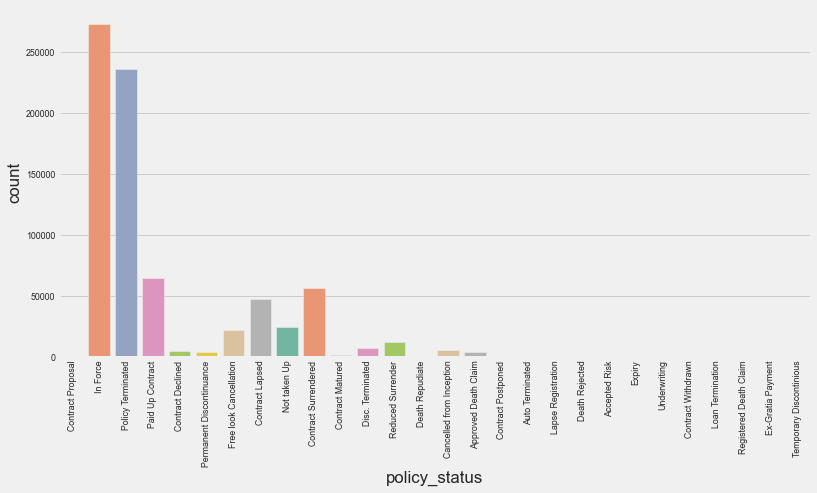

In [45]:
#df['policy_status'] = df['policy_status'].replace(np.nan, 'In Force')
plt.figure(figsize=(12,6))
ax = sns.countplot(df['policy_status'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br> removing all records with policy status as null<br> combining the green tags as not lapsed i.e 0            <br> combinig all in red tags as lapsed i.e 1 <br> removing all records with tags in grey
          </span>    
</div>

<img src="files/policy_status.jpg" width="1000" height="600">


In [153]:
#removing records with status null
df = df.loc[df['policy_status'].notnull()]
df.reset_index(drop=True, inplace=True)

In [154]:
# removing all grey records
df_ = df[(df['policy_status'] == 'Contract Withdrawn') | (df['policy_status'] == 'Underwriting') | (df['policy_status'] == 'Contract Postponed') | (df['policy_status'] == 'Contract Proposal') |  (df['policy_status'] == 'Contract Declined') | (df['policy_status'] == 'Cancelled from Inception') | (df['policy_status'] == 'Free look Cancellation') | (df['policy_status'] == 'Cancel From Inception') | (df['policy_status'] == 'Not taken Up')]

In [155]:
df.drop(df_.index, inplace = True)

In [156]:
df.reset_index(drop = True, inplace=True)

In [157]:
#checking new percentage after removal of records
df['policy_status'].value_counts(normalize=True)*100

In Force                   38.54947
Policy Terminated          33.34160
Paid Up Contract            9.13983
Contract Surrendered        8.01466
Contract Lapsed             6.73538
Reduced Surrender           1.67402
Disc. Terminated            1.07333
Permanent Discontinuance    0.59534
Approved Death Claim        0.52842
Contract Matured            0.16539
Death Repudiate             0.11171
Auto Terminated             0.02141
Death Rejected              0.02000
Accepted Risk               0.01212
Registered Death Claim      0.00845
Loan Termination            0.00352
Lapse Registration          0.00282
Expiry                      0.00141
Ex-Gratia Payment           0.00099
Temporary Discontinious     0.00014
Name: policy_status, dtype: float64

In [158]:
#combinig the green and red tags-- green as 0 and red as 1
df['policy_status'] = df['policy_status'].map({'In Force' : 0, 'Policy Terminated' : 1 ,'Full Surrender' : 1, 'Contract Surrendered' : 1,  'Paid Up Contract' :0, 'Contract Lapsed' :1, 'Matured' :0, 'Reduced Surrender' : 0, 'Terminated by various reasons' : 1, 'Death Claim Processed':0, 'Approved Death Claim':0, 'Contract Matured' : 0, 'Disc. Terminated' :1, 'Permanent Discontinuance' : 0, 'Auto Terminated' :1, 'Death Repudiate' : 0 , 'Death Rejected' : 0, 'Accepted Risk' : 0, 'Registered Death Claim' : 0, 'Loan Termination' :1, 'Lapse Registration' : 1, 'Expiry' : 0, 'Ex-Gratia Payment' : 0, 'Temporary Discontinious' : 0  })

In [159]:
df['policy_status'].value_counts()

0    360655
1    349194
Name: policy_status, dtype: int64

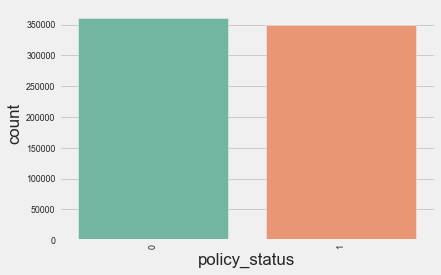

In [160]:
style.use('fivethirtyeight')
ax = sns.countplot(df['policy_status'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.4 prem freq
            </span>   
        </font>    
</h3>

In [54]:
df['premium_frequency'].value_counts(normalize=True)*100

Annual        57.10693
Monthly       35.91341
Semi Annual    5.74319
Quarterly      1.23646
Name: premium_frequency, dtype: float64

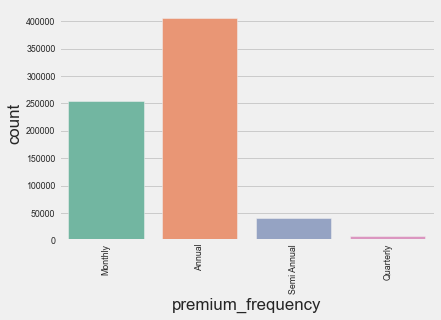

In [55]:
style.use('fivethirtyeight')
ax = sns.countplot(df['premium_frequency'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.5 gender
            </span>   
        </font>    
</h3>

In [56]:
df['gender_c'].value_counts(normalize=True)*100

Male     83.83676
Female   16.16324
Name: gender_c, dtype: float64

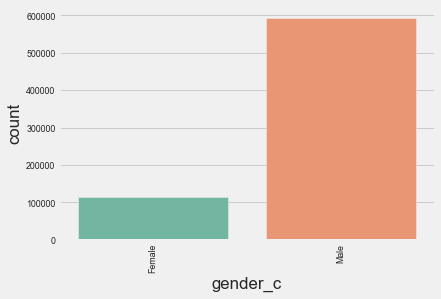

In [57]:
style.use('fivethirtyeight')
ax = sns.countplot(df['gender_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

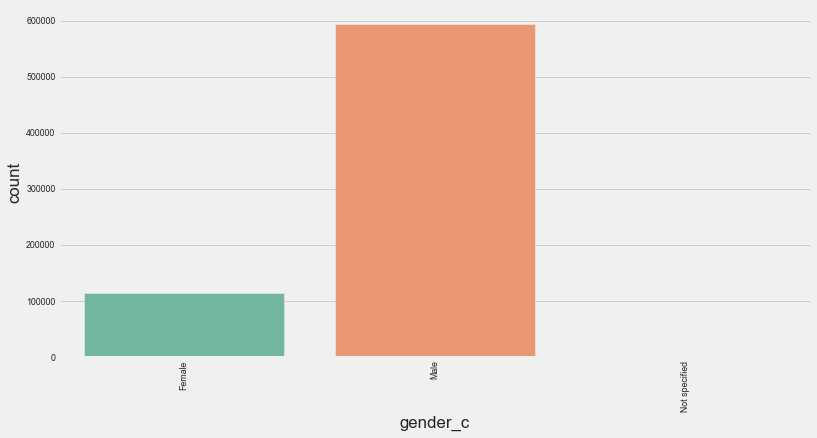

In [161]:
#imputing null gender with  ale as it has the most significant values
df['gender_c'] = df['gender_c'].replace(np.nan, 'Not specified')
plt.figure(figsize=(12,6))
ax = sns.countplot(df['gender_c'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.3.7 age
            </span>   
        </font>    
</h3>

In [162]:
df['propsal_date'] = pd.to_datetime(df['propsal_date'])
df['date_of_birth_c'] = pd.to_datetime(df['date_of_birth_c'], errors = 'coerce')

In [163]:
df['age'] = (df['propsal_date']  - df['date_of_birth_c'])/np.timedelta64(1, 'Y')

In [164]:
df['age'].describe()

count   709848.00000
mean        34.44398
std         10.73525
min         -0.71186
25%         26.31950
50%         33.27652
75%         41.42453
max        116.44592
Name: age, dtype: float64

<a id="numnull"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            4.4 Numerical Columns Null Value Treatment
            </span>   
        </font>    
</h2>

In [64]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp['unq_val_percent'] = df[value].nunique()/len(df)*100
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [65]:
df_num = Num_info(df,numerical_col)
df_num

,null_values,null_percent,unq_val_percent
columns,,,
annual_income_c,10872,1.50000,1.42678
sundry_bal_amt,4823,0.70000,4.99134
id,0,0.00000,100.00000
policy_term,0,0.00000,0.01240
premium_term,0,0.00000,0.00733
premium,0,0.00000,5.15025
agent_code,0,0.00000,1.64683
sum_assured_c,0,0.00000,17.64206
count_of_concern,0,0.00000,0.00127


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.1 annual income
            </span>   
        </font>    
</h3>

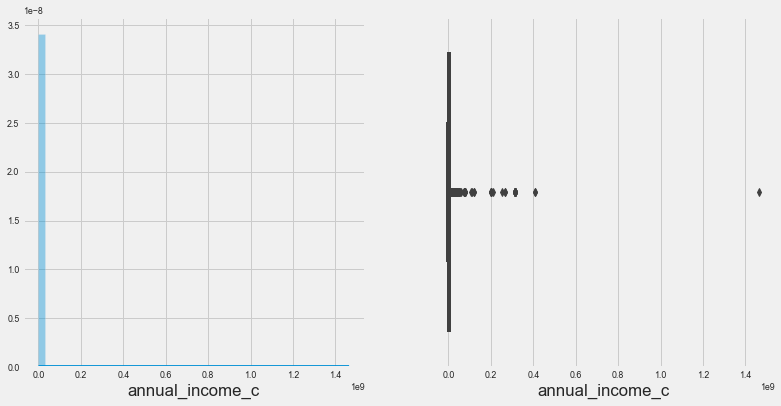

In [66]:
#checking distribution and box plot
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['annual_income_c'])
plt.subplot(1,2,2)
sns.boxplot(df['annual_income_c'])
plt.show()

In [67]:
#checking stats on annual income 
df['annual_income_c'].describe().apply(lambda x: format(x, 'f'))

count        698977.000000
mean         360721.527661
std         2626432.868123
min               0.000000
25%          180000.000000
50%          300000.000000
75%          400000.000000
max      1464799398.000000
Name: annual_income_c, dtype: object

In [165]:
#replacing null annual income with medial which is 0
df['annual_income_c'] = df['annual_income_c'].replace(np.nan, df['annual_income_c'].median())
#plt.figure(figsize=(12,6))
#ax = sns.countplot(df['gender_c'],palette = 'Set2')
#plt.xticks(rotation = 90)
#plt.show()

In [72]:
ann_inc = df[(df['annual_income_c'] > df['annual_income_c'].quantile(.5)) & (df['annual_income_c'] < df['annual_income_c'].quantile(.95))]['annual_income_c']


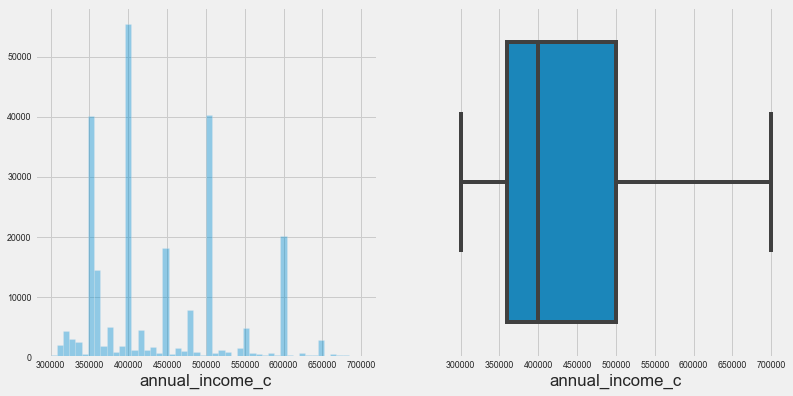

In [73]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(ann_inc, kde=False)
plt.subplot(1,2,2)
sns.boxplot(ann_inc)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.2 premium
            </span>   
        </font>    
</h3>

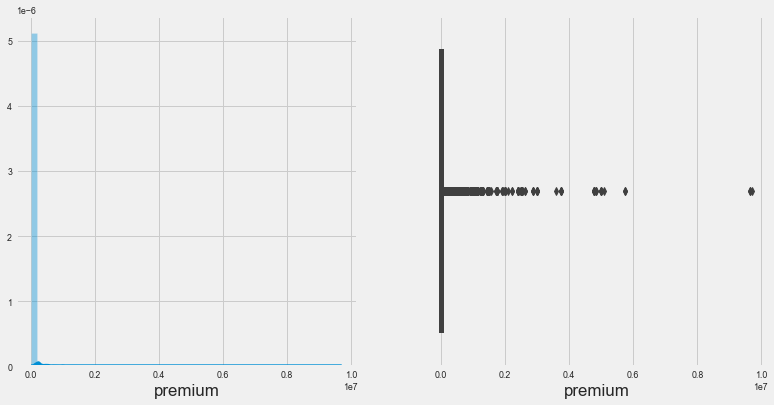

In [74]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['premium'])
plt.subplot(1,2,2)
sns.boxplot(df['premium'])
plt.show()

In [75]:
df[df['premium'] < 0]['premium'].count()

0

In [76]:
df[df['premium'] == 0]['premium'].count()

0

In [79]:
prm = df[(df['premium'] > df['premium'].quantile(.5)) & (df['premium'] < df['premium'].quantile(.95))]['premium']


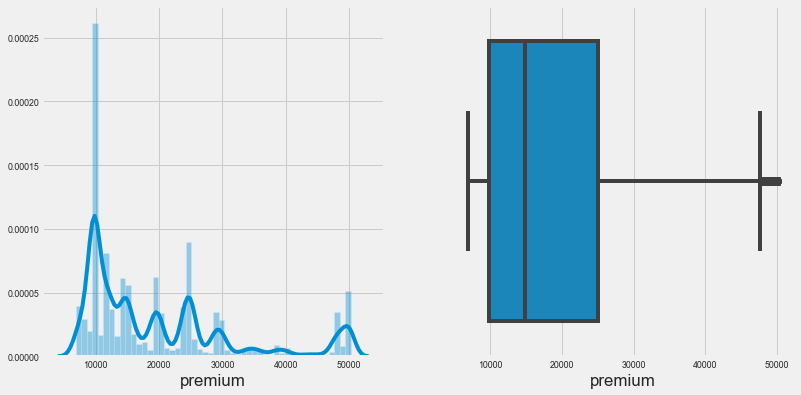

In [80]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(prm)
plt.subplot(1,2,2)
sns.boxplot(prm)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.2 premium term
            </span>   
        </font>    
</h3>

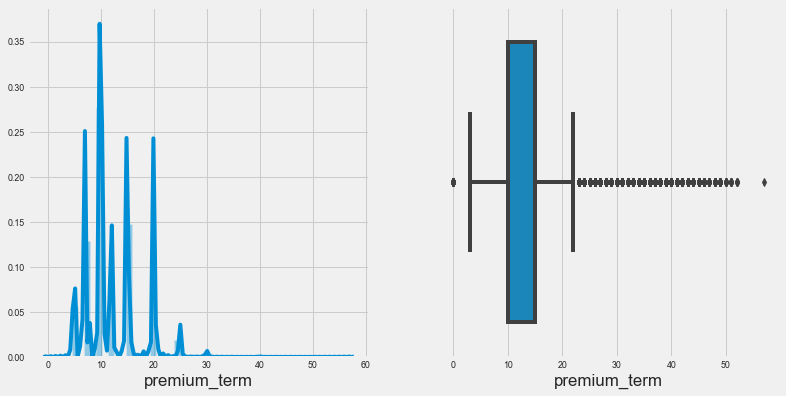

In [81]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['premium_term'])
plt.subplot(1,2,2)
sns.boxplot(df['premium_term'])
plt.show()

In [82]:
df['premium_term'].describe().apply(lambda x: format(x, 'f'))

count    709849.000000
mean         12.221923
std           5.083680
min           0.000000
25%          10.000000
50%          10.000000
75%          15.000000
max          57.000000
Name: premium_term, dtype: object

In [166]:
#replacing null premium term with median value
df['premium_term'] = df['premium_term'].replace(np.nan, df['premium_term'].median())


<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.3 sundry bal amount
            </span>   
        </font>    
</h3>

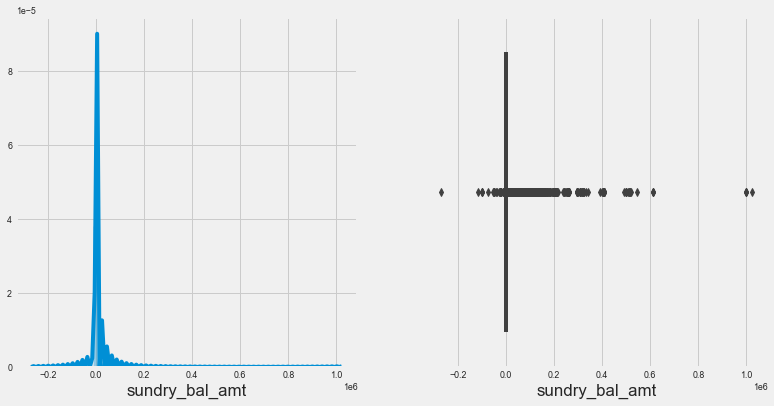

In [84]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['sundry_bal_amt'])
plt.subplot(1,2,2)
sns.boxplot(df['sundry_bal_amt'])
plt.show()

In [85]:
df['sundry_bal_amt'].describe().apply(lambda x: format(x, 'f'))

count     705026.000000
mean        1213.428156
std         6826.666562
min      -271035.870000
25%            0.000000
50%            0.000000
75%          100.000000
max      1022631.100000
Name: sundry_bal_amt, dtype: object

In [86]:
sbl = df[(df['sundry_bal_amt'] > df['sundry_bal_amt'].quantile(.5)) & (df['sundry_bal_amt'] < df['sundry_bal_amt'].quantile(.95))]['sundry_bal_amt']


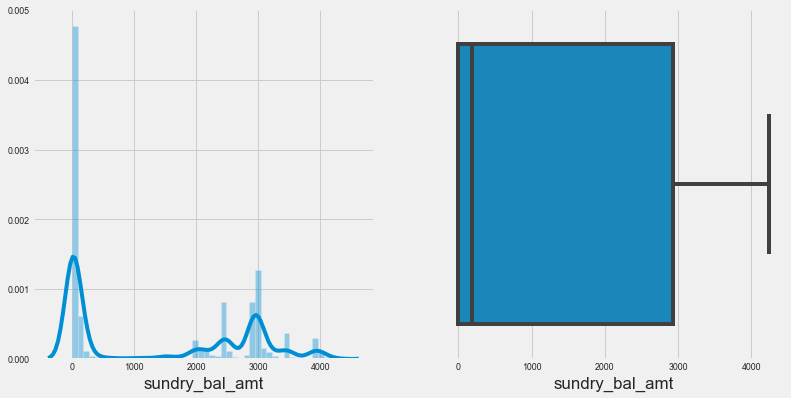

In [88]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(sbl)
plt.subplot(1,2,2)
sns.boxplot(sbl)
plt.show()

In [89]:
df[df['sundry_bal_amt'] == 0]['sundry_bal_amt'].count()/len(df)

0.583338146563565

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.4 policy term
            </span>   
        </font>    
</h3>

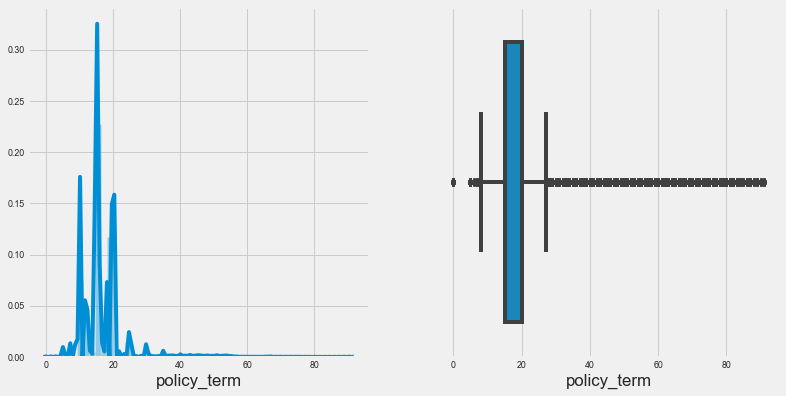

In [90]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['policy_term'])
plt.subplot(1,2,2)
sns.boxplot(df['policy_term'])
plt.show()

In [91]:
df['policy_term'].describe().apply(lambda x: format(x, 'f'))

count    709849.000000
mean         16.995288
std           7.624612
min           0.000000
25%          15.000000
50%          15.000000
75%          20.000000
max          91.000000
Name: policy_term, dtype: object

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.4 sum_assured_c
            </span>   
        </font>    
</h3>

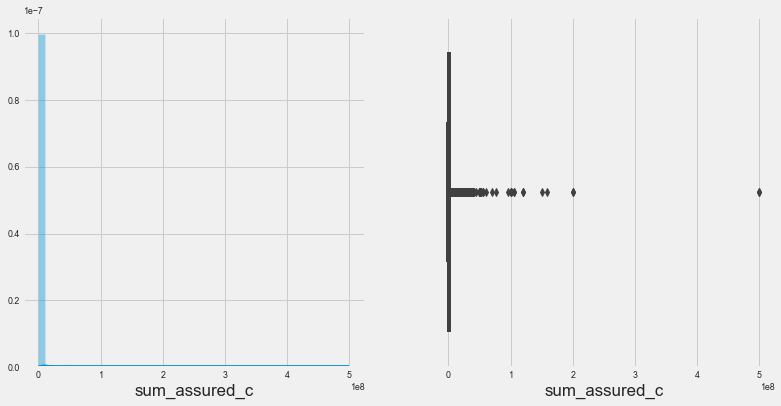

In [92]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['sum_assured_c'])
plt.subplot(1,2,2)
sns.boxplot(df['sum_assured_c'])
plt.show()

In [93]:
df['sum_assured_c'].describe().apply(lambda x: format(x, 'f'))

count       709849.000000
mean        288782.262395
std        1297699.579073
min              0.000000
25%          82475.000000
50%         147000.000000
75%         250000.000000
max      500000000.000000
Name: sum_assured_c, dtype: object

In [96]:
tt = df[(df['sum_assured_c'] > df['sum_assured_c'].quantile(.5)) & (df['sum_assured_c'] < df['sum_assured_c'].quantile(.95))]['sum_assured_c']


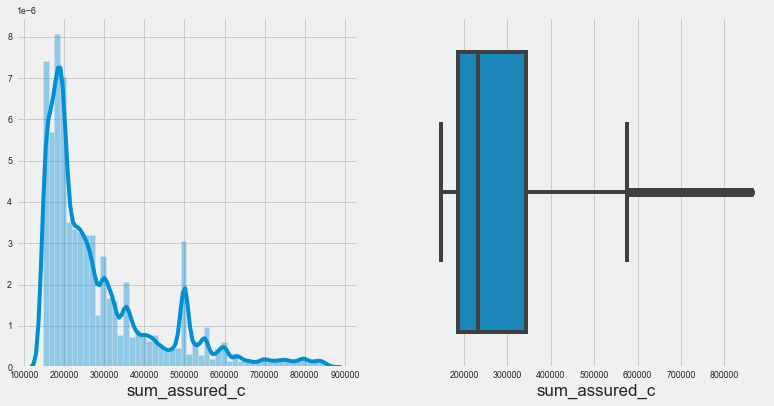

In [97]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(tt)
plt.subplot(1,2,2)
sns.boxplot(tt)
plt.show()

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.5 count of concern
            </span>   
        </font>    
</h3>

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


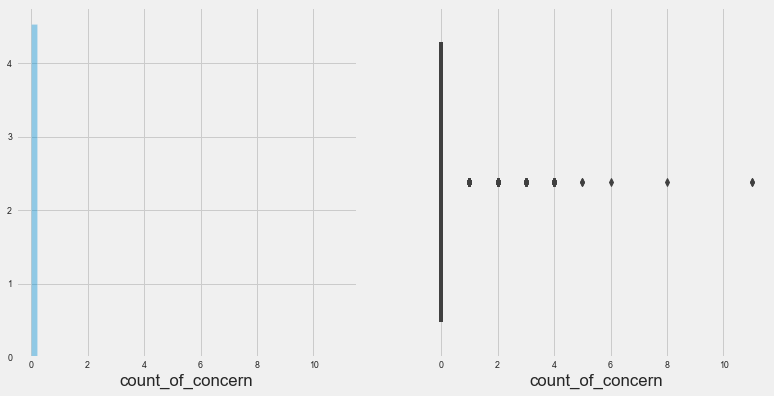

In [98]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['count_of_concern'])
plt.subplot(1,2,2)
sns.boxplot(df['count_of_concern'])
plt.show()

In [99]:
df['count_of_concern'].describe().apply(lambda x: format(x, 'f'))

count    709849.000000
mean          0.002457
std           0.073720
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: count_of_concern, dtype: object

<h3>   
      <font color = darkgreen >
            <span style='font-family:Georgia'>
            4.4.5 count of complaint
            </span>   
        </font>    
</h3>

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


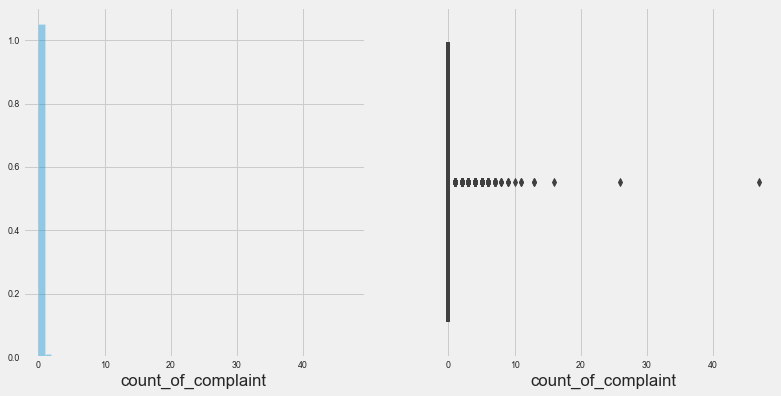

In [100]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(df['count_of_complaint'])
plt.subplot(1,2,2)
sns.boxplot(df['count_of_complaint'])
plt.show()

In [101]:
df['count_of_complaint'].describe().apply(lambda x: format(x, 'f'))

count    709849.000000
mean          0.015874
std           0.184697
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          47.000000
Name: count_of_complaint, dtype: object

In [102]:
ttij = df[(df['count_of_complaint'] > df['count_of_complaint'].quantile(.90))]['count_of_complaint']

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


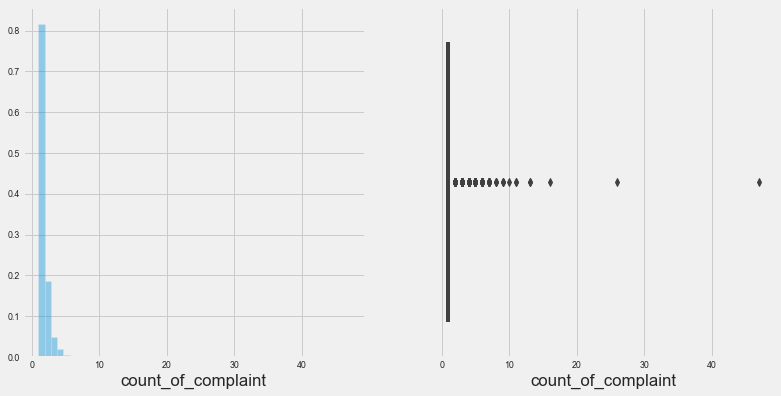

In [103]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(ttij)
plt.subplot(1,2,2)
sns.boxplot(ttij)
plt.show()

# Exploratory Data Analysis 

<a id="imbalance"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.1 Data Imbalance
            </span>   
        </font>    
</h2>

In [104]:
lapsed = df['policy_status'].value_counts().rename_axis('policy_status').to_frame('counts')
lapsed

,counts
policy_status,
0,360655
1,349194


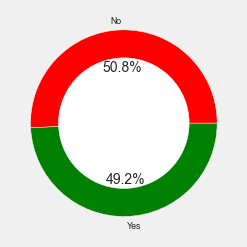

In [105]:

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(lapsed.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


<a id="graphfunc"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.2 Graph Functions
            </span>   
        </font>    
</h2>

In [106]:
# function for plotting repetitive countplots in univariate categorical analysis on the dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t lapsed; 
# 2. Percentage of lapsed within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = df[feature].value_counts()
    temp_perc = df[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Lapsed': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = df[[feature, 'policy_status']].groupby([feature],as_index=False).mean()
    cat_perc["policy_status"] = cat_perc["policy_status"]*100
    cat_perc.sort_values(by='policy_status', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="policy_status",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not lapsed','lapsed'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='policy_status', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of lapse [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( lapsed % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

  premium_frequency  Total Lapsed  % Values
0            Annual        405373  57.10693
1           Monthly        254931  35.91341
2       Semi Annual         40768   5.74319
3         Quarterly          8777   1.23646


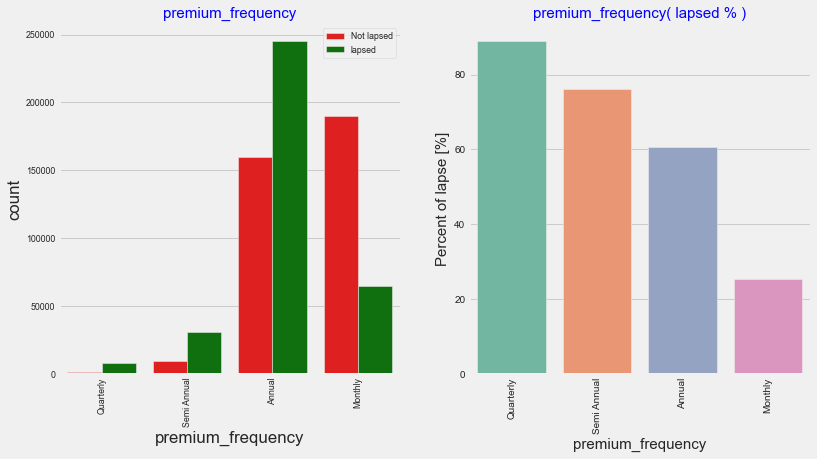

In [107]:
univariate_categorical("premium_frequency",label_rotation=True)

               payment_method  Total Lapsed  % Values
0                      Cheque        342968  48.31563
1               Direct Debits        211461  29.78957
2    Automated Clearing House        107506  15.14491
3                         ECS         31348   4.41615
4  Auto Debit (Clone of Cash)         11133   1.56836
5       Direct Billing (Cash)          2975   0.41910
6                 Credit Card          2458   0.34627


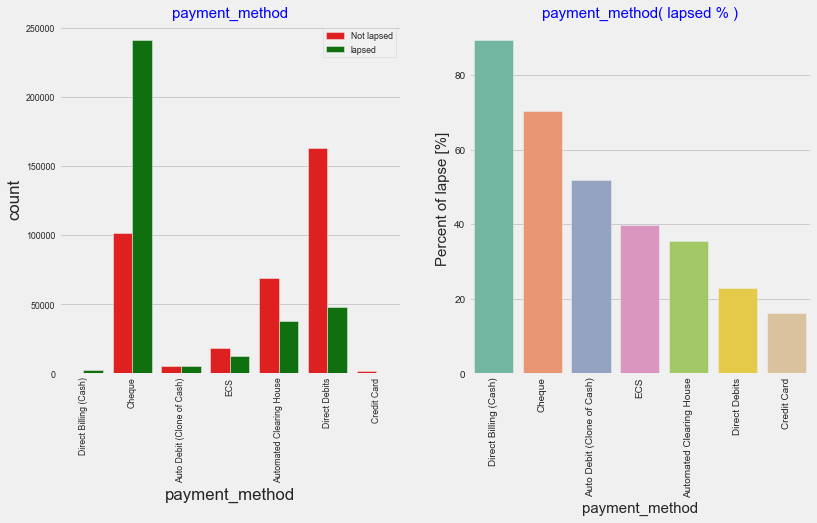

In [108]:
univariate_categorical("payment_method",label_rotation=True)

  marital_status_c  Total Lapsed  % Values
0          Married        510216  72.26733
1        UnMarried        186983  26.48439
2            Widow          6270   0.88809
3          Widower          1320   0.18697
4         Divorcee          1223   0.17323


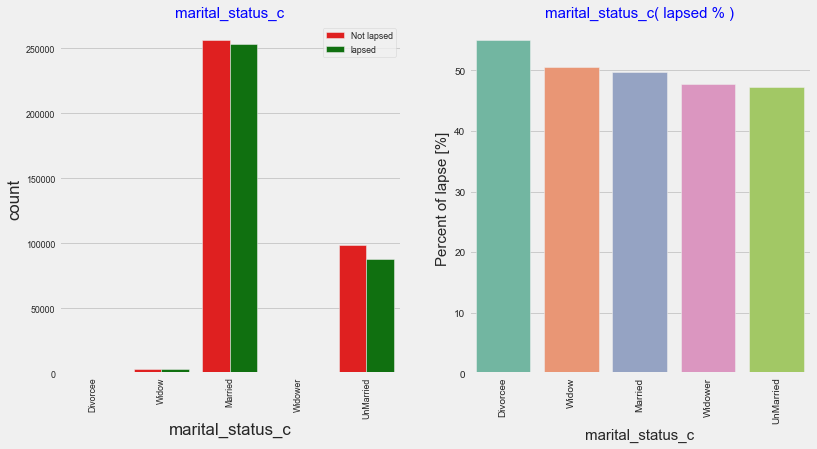

In [109]:
univariate_categorical("marital_status_c",label_rotation=True)

        gender_c  Total Lapsed  % Values
0           Male        594162  83.70259
1         Female        114551  16.13738
2  Not specified          1136   0.16003


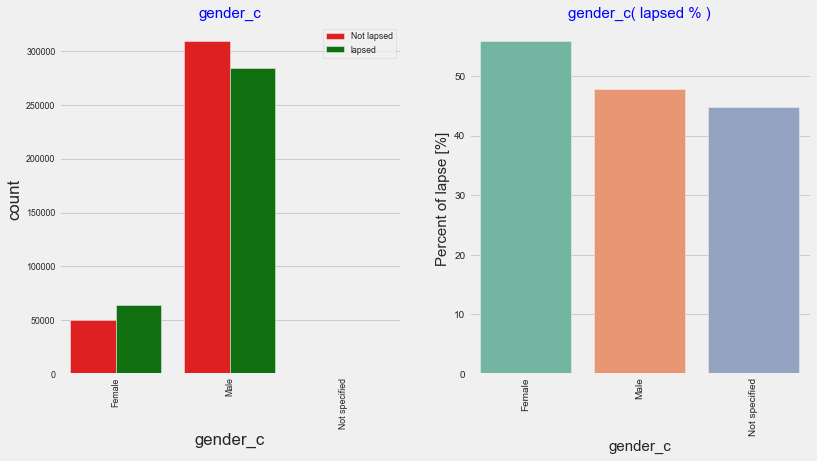

In [110]:
univariate_categorical("gender_c",label_rotation=True)

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.4 Univariate Analysis - Numerical
            </span>   
        </font>    
</h2>

C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\skr25\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


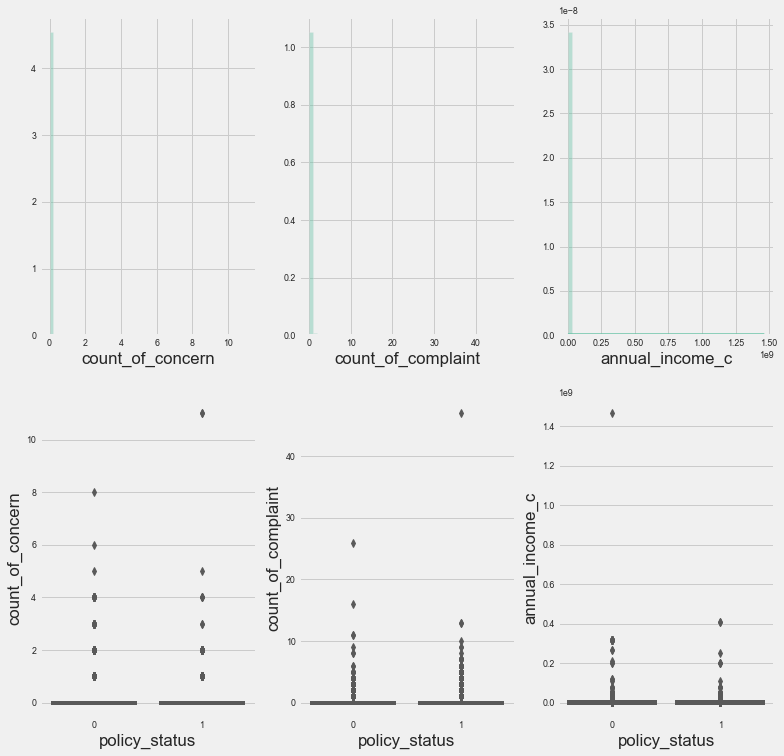

In [111]:
numerical_cols = ['count_of_concern', 'count_of_complaint', 'annual_income_c']
plt.figure(figsize=(20,12))

i=1
for col in numerical_cols:
    plt.subplot(2,5,i)
    sns.distplot(df[col])
    plt.subplot(2,5,5+i)
    sns.boxplot(y=df[col], x = df['policy_status'])
    i+=1

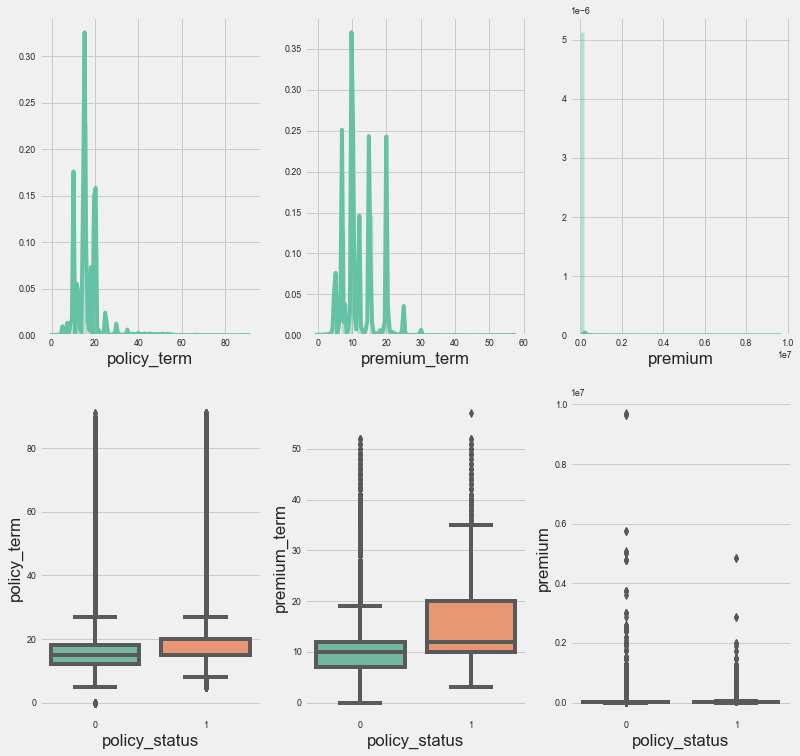

In [112]:
numerical_cols = ['policy_term', 'premium_term', 'premium']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(df[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=df[col], x = df['policy_status'])
    i+=1

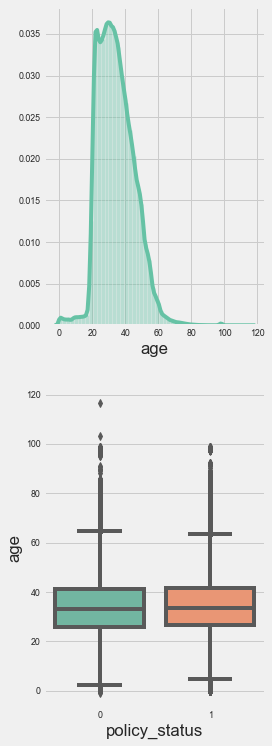

In [113]:
numerical_cols = ['age']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(df[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=df[col], x = df['policy_status'])
    i+=1

In [115]:
#removing outliers for premium and sum assured
tt = df[(df['sum_assured_c'] > df['sum_assured_c'].quantile(.5)) & (df['sum_assured_c'] < df['sum_assured_c'].quantile(.95))]['sum_assured_c']
ttj = df[(df['premium'] > df['premium'].quantile(.5)) & (df['premium'] < df['premium'].quantile(.95))]['premium']
tti = df[(df['annual_income_c'] > df['annual_income_c'].quantile(.5)) & (df['annual_income_c'] < df['annual_income_c'].quantile(.95))]['annual_income_c']

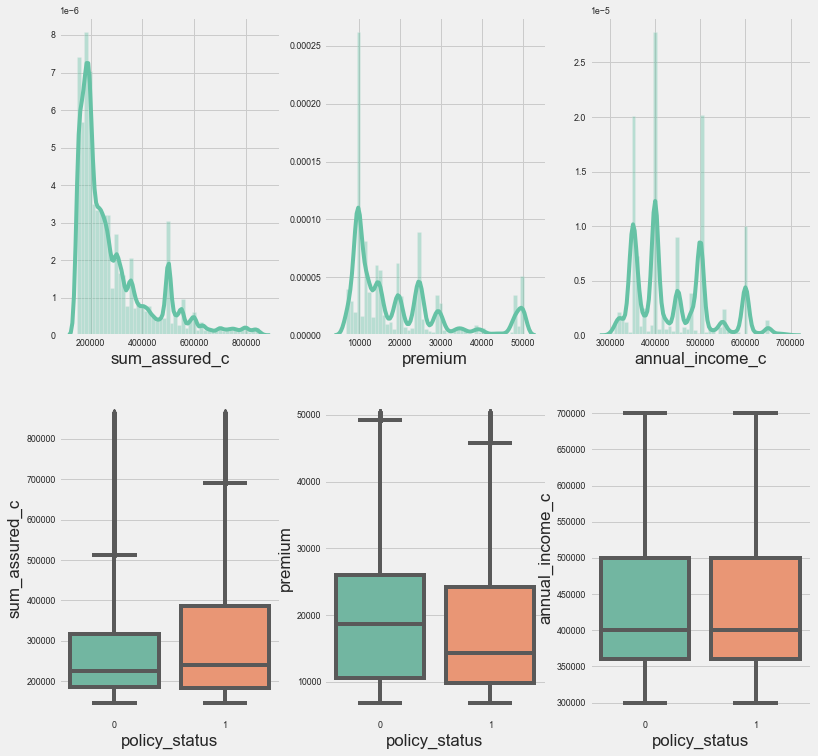

In [116]:
numerical_cols = [tt,ttj,tti]
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(col)
    plt.subplot(2,3,3+i)
    sns.boxplot(y=col, x = df['policy_status'])
    i+=1

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.5 Dropping columns
            </span>   
        </font>    
</h2>

In [167]:
df.drop(['id', 'risk_comm_date','maturity_date','sundry_bal_amt','account_id','account_id_c','date_of_birth_c','proposal_number','next_due_date','propsal_date'], axis =1, inplace = True)

In [168]:
df.drop(['agent_code','date_of_lapse','branch'], inplace=True, axis =1)

In [169]:
df.drop(['policy_type_c'], axis=1, inplace =True)

In [170]:
df.isnull().sum()

policy_term           0
premium_term          0
policy_status         0
premium_frequency     0
payment_method        0
premium               0
sum_assured_c         0
marital_status_c      0
gender_c              0
annual_income_c       0
count_of_concern      0
count_of_complaint    0
age                   1
dtype: int64

# Feature Engineering

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.5 Feature conversion - marital status,policy status,gender
            </span>   
        </font>    
</h2>

<div class="alert alert-block alert-warning">
    <span style='font-family:Georgia'>
        <b>Strategy: </b><br> For marital status combining (Widow, Widower) as widow  <br> for policy status individual as 1, group as 0, <br> for gender Male as 1, female as 0 
</div>

In [171]:
df['marital_status_c'].value_counts()

Married          510216
UnMarried        186983
Widow              6270
Not specified      3837
Widower            1320
Divorcee           1223
Name: marital_status_c, dtype: int64

In [172]:
series = ['Widow' , 'Widower']


In [173]:
df = df.assign(marital_status_c = np.where(df['marital_status_c'].isin(series),'widow', df['marital_status_c']))

In [174]:
df['marital_status_c'].value_counts()

Married          510216
UnMarried        186983
widow              7590
Not specified      3837
Divorcee           1223
Name: marital_status_c, dtype: int64

In [176]:
df['gender_c'] = df['gender_c'].map({'Male' :1, 'Female' :0}) 

In [203]:
#replacing null gender with median value
df['gender_c'] = df['gender_c'].replace(np.nan, df['gender_c'].median())


In [177]:
df.columns

Index(['policy_term', 'premium_term', 'policy_status', 'premium_frequency',
       'payment_method', 'premium', 'sum_assured_c', 'marital_status_c',
       'gender_c', 'annual_income_c', 'count_of_concern', 'count_of_complaint',
       'age'],
      dtype='object')

<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.7 dummy encoding categotical features
            </span>   
        </font>    
</h2>

In [178]:
dummy1 = pd.get_dummies(df[['premium_frequency', 'payment_method', 'marital_status_c']], drop_first=True)
# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df = df.drop(['premium_frequency', 'payment_method', 'marital_status_c'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709849 entries, 0 to 709848
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   policy_term                              709849 non-null  float64
 1   premium_term                             709849 non-null  float64
 2   policy_status                            709849 non-null  int64  
 3   premium                                  709849 non-null  float64
 4   sum_assured_c                            709849 non-null  float64
 5   gender_c                                 708713 non-null  float64
 6   annual_income_c                          709849 non-null  float64
 7   count_of_concern                         709849 non-null  int64  
 8   count_of_complaint                       709849 non-null  int64  
 9   age                                      709848 non-null  float64
 10  premium_frequency_Monthly       

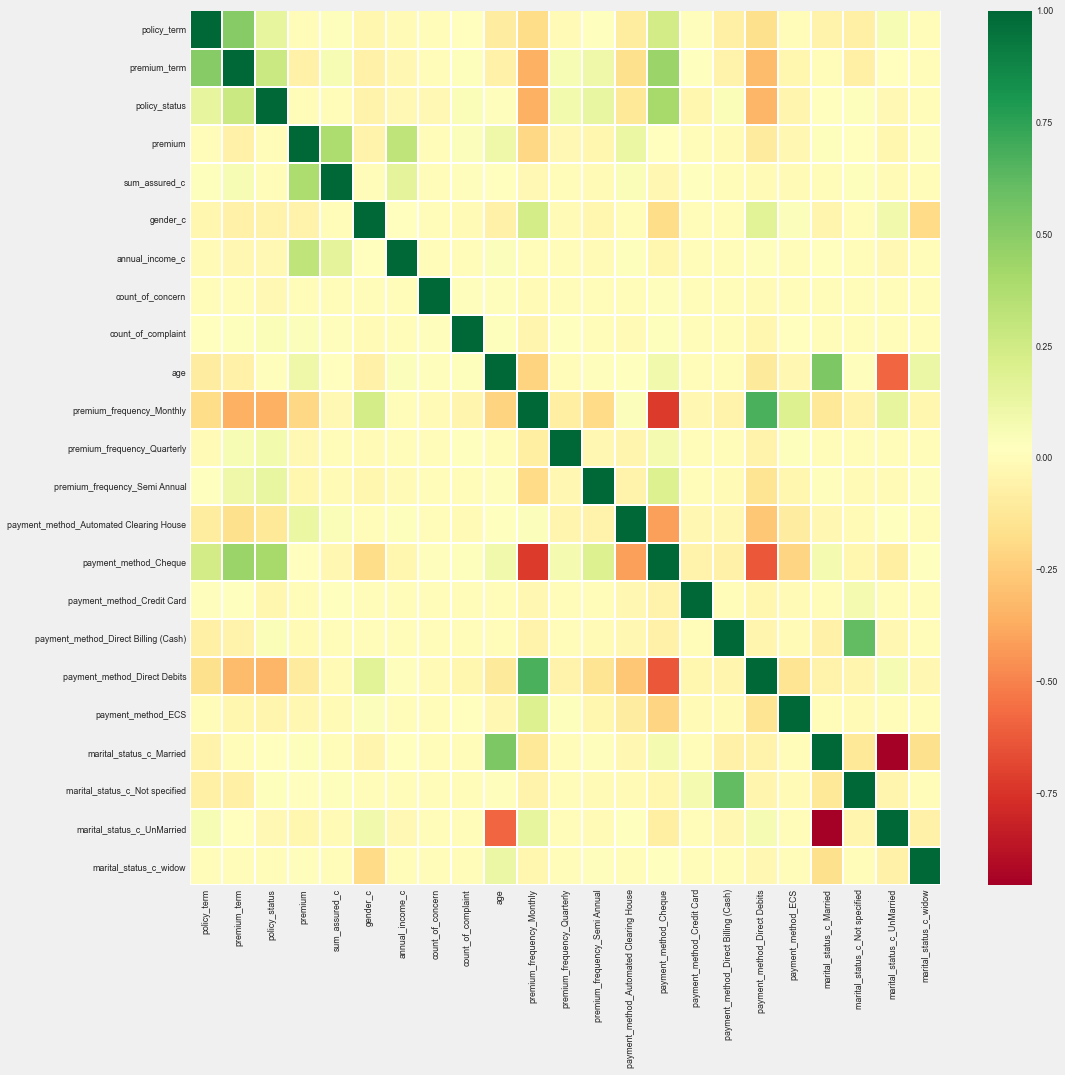

In [204]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [180]:
corr_df1 = df.corr()
corr_df1 = corr_df1.where(np.triu(np.ones(corr_df1.shape),k=1).astype(np.bool))
corr_df = corr_df1.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
401,payment_method_Direct Debits,premium_frequency_Monthly,0.67293
476,marital_status_c_Not specified,payment_method_Direct Billing (Cash),0.61144
446,marital_status_c_Married,age,0.53987
23,premium_term,policy_term,0.50392
323,payment_method_Cheque,premium_term,0.44240


<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.8 Train-Test split
            </span>   
        </font>    
</h2>

In [205]:
# target variable
Y = df['policy_status']
X = df.drop(['policy_status'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [206]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (567879, 22)
 Shape of y_train is :  (567879,)
 Shape of X_test is  :  (141970, 22)
 Shape of y_test is  :  (141970,)


<a id="uninumvar"></a>
<h2>   
      <font color = purple >
            <span style='font-family:Georgia'>
            5.9 Scaling numerical features
            </span>   
        </font>    
</h2>

In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['policy_term','premium_term', 'age']] = scaler.fit_transform(X_train[['policy_term','premium_term', 'age']])
X_train.head()

,policy_term,premium_term,premium,sum_assured_c,gender_c,annual_income_c,count_of_concern,count_of_complaint,age,premium_frequency_Monthly,premium_frequency_Quarterly,premium_frequency_Semi Annual,payment_method_Automated Clearing House,payment_method_Cheque,payment_method_Credit Card,payment_method_Direct Billing (Cash),payment_method_Direct Debits,payment_method_ECS,marital_status_c_Married,marital_status_c_Not specified,marital_status_c_UnMarried,marital_status_c_widow
454732,0.36264,0.63462,5028.00000,693000.00000,1.00000,684000.00000,0,0,0.36547,0,0,0,1,0,0,0,0,0,1,0,0,0
512695,0.16484,0.19231,3071.00000,242333.00000,1.00000,200000.00000,0,0,0.24463,1,0,0,0,0,0,0,1,0,1,0,0,0
432441,0.10989,0.13462,2413.00000,115596.00000,1.00000,400000.00000,0,0,0.31616,1,0,0,1,0,0,0,0,0,1,0,0,0
597377,0.19780,0.19231,3349.00000,219245.00000,1.00000,450000.00000,0,0,0.20518,1,0,0,0,0,0,0,1,0,0,0,1,0
330977,0.10989,0.13462,2020.00000,100000.00000,1.00000,300000.00000,0,0,0.28050,1,0,0,0,0,0,0,1,0,1,0,0,0


In [208]:
from sklearn.preprocessing import RobustScaler
RBscaler = RobustScaler()
X_train[['premium' , 'sum_assured_c', 'annual_income_c']] = RBscaler.fit_transform(X_train[['premium' , 'sum_assured_c','annual_income_c']])
X_train.head()


,policy_term,premium_term,premium,sum_assured_c,gender_c,annual_income_c,count_of_concern,count_of_complaint,age,premium_frequency_Monthly,premium_frequency_Quarterly,premium_frequency_Semi Annual,payment_method_Automated Clearing House,payment_method_Cheque,payment_method_Credit Card,payment_method_Direct Billing (Cash),payment_method_Direct Debits,payment_method_ECS,marital_status_c_Married,marital_status_c_Not specified,marital_status_c_UnMarried,marital_status_c_widow
454732,0.36264,0.63462,-0.13351,3.25669,1.00000,1.74545,0,0,0.36547,0,0,0,1,0,0,0,0,0,1,0,0,0
512695,0.16484,0.19231,-0.27390,0.56908,1.00000,-0.45455,0,0,0.24463,1,0,0,0,0,0,0,1,0,1,0,0,0
432441,0.10989,0.13462,-0.32110,-0.18673,1.00000,0.45455,0,0,0.31616,1,0,0,1,0,0,0,0,0,1,0,0,0
597377,0.19780,0.19231,-0.25395,0.43139,1.00000,0.68182,0,0,0.20518,1,0,0,0,0,0,0,1,0,0,0,1,0
330977,0.10989,0.13462,-0.34930,-0.27974,1.00000,0.00000,0,0,0.28050,1,0,0,0,0,0,0,1,0,1,0,0,0


In [209]:
X_test[['policy_term','premium_term','age']] = scaler.transform(X_test[['policy_term','premium_term','age']])

In [210]:
X_test[['premium' , 'sum_assured_c', 'annual_income_c']] = RBscaler.transform(X_test[['premium' , 'sum_assured_c','annual_income_c']])


In [211]:
X_train.isnull().sum()

policy_term                                0
premium_term                               0
premium                                    0
sum_assured_c                              0
gender_c                                   0
annual_income_c                            0
count_of_concern                           0
count_of_complaint                         0
age                                        0
premium_frequency_Monthly                  0
premium_frequency_Quarterly                0
premium_frequency_Semi Annual              0
payment_method_Automated Clearing House    0
payment_method_Cheque                      0
payment_method_Credit Card                 0
payment_method_Direct Billing (Cash)       0
payment_method_Direct Debits               0
payment_method_ECS                         0
marital_status_c_Married                   0
marital_status_c_Not specified             0
marital_status_c_UnMarried                 0
marital_status_c_widow                     0
dtype: int

In [218]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

In [212]:
from catboost import CatBoostClassifier


In [213]:
model = CatBoostClassifier(iterations=1000, l2_leaf_reg =4,depth = 10)

In [214]:
model.fit(X_train, y_train, verbose=False)

In [220]:
predict_test = model.predict(X_train)

In [221]:
lg_metrics(confusion_matrix(y_train,predict_test))

Model Accuracy value is              :  81.61 %
Model Sensitivity value is           :  80.23 %
Model Specificity value is           :  82.94 %
Model Precision value is             :  82.02 %
Model Recall value is                :  80.23 %
Model True Positive Rate (TPR)       :  80.23 %
Model False Positive Rate (FPR)      :  17.06 %
Model Poitive Prediction Value is    :  82.02 %
Model Negative Prediction value is   :  81.23 %


In [222]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [224]:
from sklearn.linear_model import LogisticRegression


In [225]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\skr25\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
predict_test = clf.predict(X_train)

In [227]:
lg_metrics(confusion_matrix(y_train,predict_test))

Model Accuracy value is              :  71.16 %
Model Sensitivity value is           :  71.84 %
Model Specificity value is           :  70.51 %
Model Precision value is             :  70.26 %
Model Recall value is                :  71.84 %
Model True Positive Rate (TPR)       :  71.84 %
Model False Positive Rate (FPR)      :  29.49 %
Model Poitive Prediction Value is    :  70.26 %
Model Negative Prediction value is   :  72.08 %


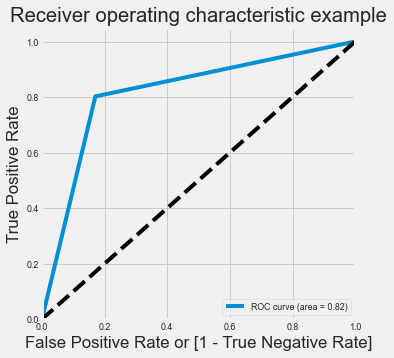

In [223]:
draw_roc(y_train, predict_test)